# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.target)
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
train = df
df['Class']= iris.target

print(iris.target_names) 
df.groupby('Class').count()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


The three classes are - Iris-Setosa, Iris-Versicolour and Iris-Virginica
We see that each class has 50 samples

Make a pair plot of the iris features colored by their true classification.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='Class', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='Class', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='Cl

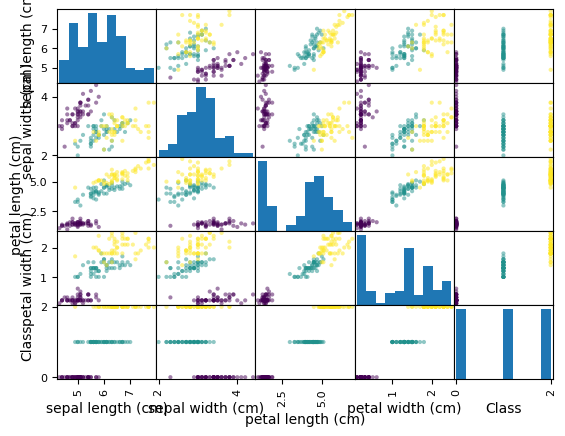

In [8]:
pd.plotting.scatter_matrix(df, c=df['Class'])

In [9]:
# complete
# complete
# complete
# complete

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

In [10]:
#kmeans2 = KMeans(n_clusters=2,init='k-means++')
#kmeans2.fit(df)
#clusters2 =  kmeans2.fit_predict(df, y=None, sample_weight=None)
#print(clusters2)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='Class', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='Class', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='Cl

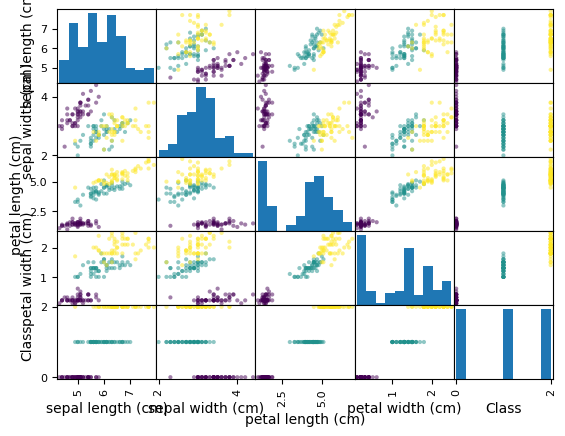

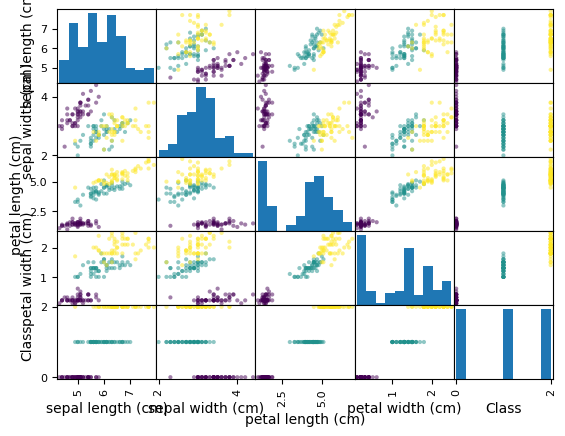

In [11]:
from sklearn import neighbors
knearest3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knearest3.fit(train,df['Class'])
classes_3 = knearest3.predict(train)
pd.plotting.scatter_matrix(df, c=classes_3)

knearest10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knearest10.fit(train,df['Class'])
classes_10 = knearest10.predict(train)
pd.plotting.scatter_matrix(df, c=classes_10)


## Training and testing on the same data is generally not a good idea because the model will always know the answer to point its trained on and cannot be generalizable

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

In [32]:
#im testing the sample code from the docs
#from sklearn import datasets, linear_model
#from sklearn.model_selection import cross_val_predict
#diabetes = datasets.load_diabetes()
#X = diabetes.data[:150]
#y = diabetes.target[:150]
#lasso = linear_model.Lasso()
#y_pred = cross_val_predict(lasso, X, y, cv=3)
#y_pred

5 negihbor accuracy 0.96


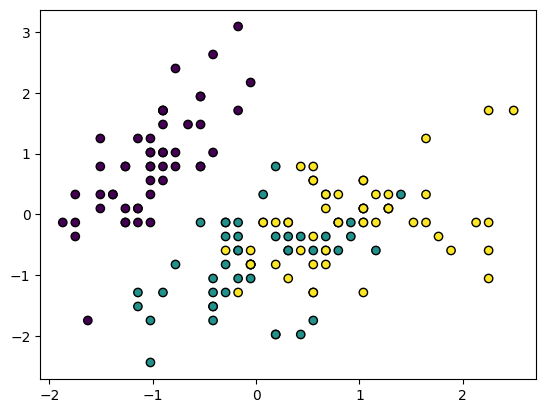

In [29]:
#reformatting to match the style of documentation because data shapes are confusing
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)
#5 neighbors
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
y_pred5 = cross_val_predict(knn5, X_scaled, y, cv=5)     # predictions on each fold
acc5 = np.mean(cross_val_score(knn5, X_scaled, y, cv=5))  # CV accuracy
print("5 negihbor accuracy",acc5)



#plotting 5 nerest neighbors
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred5, cmap='viridis', edgecolor='k')




50 negihbor accuracy 0.8733333333333334


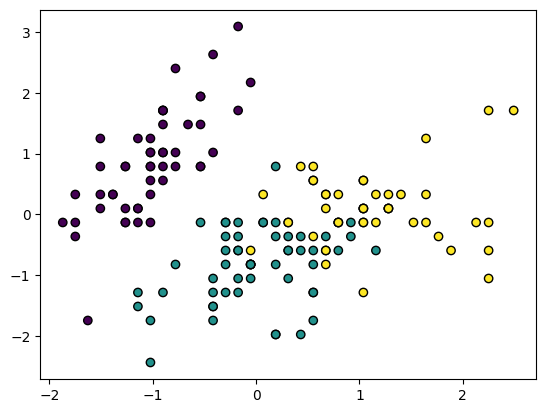

In [31]:
#50 neighbors
knn50 = neighbors.KNeighborsClassifier(n_neighbors=50)
y_pred50 = cross_val_predict(knn50, X_scaled, y, cv=5)     # predictions on each fold
acc50 = np.mean(cross_val_score(knn50, X_scaled, y, cv=5))  # CV accuracy
print("50 negihbor accuracy",acc50)
#plotting for 50 neigbors
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred50, cmap='viridis', edgecolor='k')


## We can see that when the number of neigbors becomes too big accuracy goes down as we may be looking at unrelated points

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred50)

# i really hope this is the right way to find it and there isnt a function im supposed to use
completeness = np.diag(cm) / np.sum(cm, axis=1)
purity      = np.diag(cm) / np.sum(cm, axis=0)



metrics_df = pd.DataFrame({
    'Completeness': completeness,
    'Purity': purity
}, index=iris.target_names)

print(metrics_df)

            Completeness    Purity
setosa              1.00  1.000000
versicolor          0.88  0.771930
virginica           0.74  0.860465


*Complete*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_true  = confusion_matrix(y, y_pred50, normalize='true')                           # normalize by true labels (rows)[10]
cm_pred  = confusion_matrix(y, y_pred50, normalize='pred')                           # normalize by predicted labels (columns)[10]

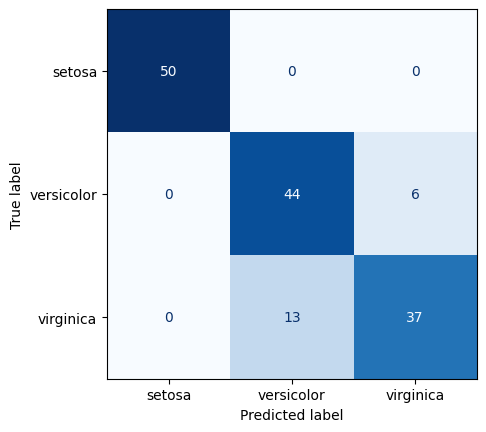

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=iris.target_names).plot(cmap=plt.cm.Blues, colorbar=False)#un normalized confusion matrix

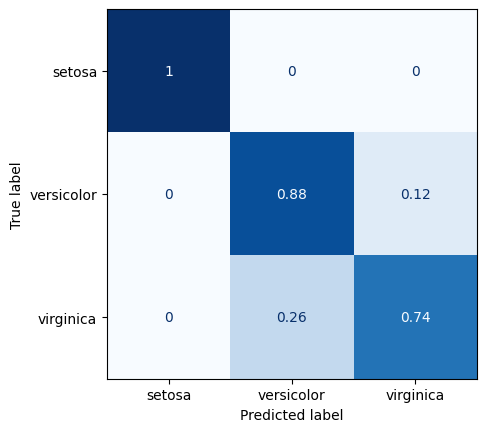

In [52]:
ConfusionMatrixDisplay(confusion_matrix=cm_true,display_labels=iris.target_names).plot(cmap=plt.cm.Blues, colorbar=False)#Row-normalized confusion matrix

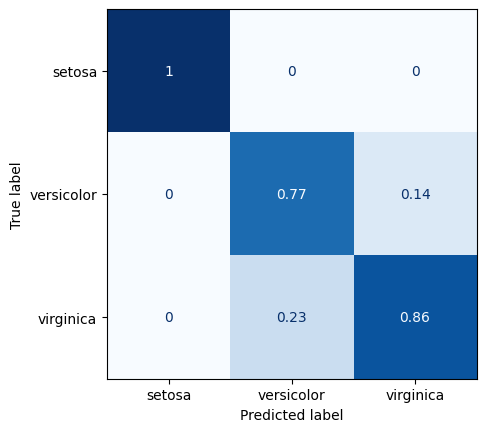

In [54]:
ConfusionMatrixDisplay(confusion_matrix=cm_pred,display_labels=iris.target_names).plot(cmap=plt.cm.Blues, colorbar=False)#COlumn-ormalized confusion matrix

## The normalized matrices are most informative: the row-normalized plot clarifies how many actual members of each class are recovered and the column-normalized plot shows how “pure” each predicted class is.